importing the necessary libraries

In [18]:
import numpy
import pandas
import joblib
import matplotlib
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np

reading the data and encoding the labels for better performence

In [19]:
with open('mfccdata_fma.npy', 'rb') as f:
    data_set=np.load(f)
print("Dataset shape:", data_set.shape)

Dataset shape: (7994, 20, 130)


In [20]:
with open('labels_fma.npy', 'rb') as f:
    labels=np.load(f)
print("labels shape:", labels.shape)

labels shape: (7994,)


In [21]:
encoder = LabelEncoder()
labels = encoder.fit_transform(labels)

In [22]:
print(labels.shape)
print(data_set.shape)

(7994,)
(7994, 20, 130)


In [23]:
#labels
genres=['Electronic','Experimental','Folk','HipHop','Instrumental','International','Pop','Rock']

In [24]:
x=data_set
y=labels

In [25]:
print("recommended number of hidden layers",int(800/(2*(10+36))))

recommended number of hidden layers 8


Classification using CNN

Import mfcc data :

In [26]:
with open('mfccdata_fma.npy', 'rb') as f:
    data_set=np.load(f)
print("Dataset shape:", data_set.shape)

Dataset shape: (7994, 20, 130)


In [27]:
with open('labels_fma.npy', 'rb') as f:
    labels=np.load(f)
print("labels shape:", labels.shape)

labels shape: (7994,)


label encoding :

In [28]:
from keras.utils import to_categorical

x = data_set

encoder = LabelEncoder()
labels = encoder.fit_transform(labels)

y = labels
y = to_categorical(y,num_classes=8)

defining parameters :

In [29]:
from keras.layers import Input

SEED = 42
CONV_FILTER_COUNT = 256
BATCH_SIZE = 32
EPOCH_COUNT = 100
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
n_features = X_train.shape[2]
input_shape = (None,n_features)
model= Input(input_shape, name='input')



Importing libraries :

In [30]:
from keras.models import Sequential
from keras.layers import Activation
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Conv1D
from keras.layers import MaxPooling1D
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import AveragePooling2D
from keras.layers import Input
from keras.layers import GRU
from keras.layers import LSTM
from keras.layers import concatenate
from keras.models import Model
from keras.applications.vgg16 import VGG16
import matplotlib.pyplot as plt


The architecture :

Epoch 1/100
175/175 [==============================] - 21s 109ms/step - loss: 2.0251 - accuracy: 0.1859 - val_loss: 1.9327 - val_accuracy: 0.2368
Epoch 2/100
175/175 [==============================] - 19s 107ms/step - loss: 1.9108 - accuracy: 0.2493 - val_loss: 1.8372 - val_accuracy: 0.2743
Epoch 3/100
175/175 [==============================] - 24s 140ms/step - loss: 1.8632 - accuracy: 0.2654 - val_loss: 1.8638 - val_accuracy: 0.2739
Epoch 4/100
175/175 [==============================] - 24s 135ms/step - loss: 1.8418 - accuracy: 0.2779 - val_loss: 1.8023 - val_accuracy: 0.2885
Epoch 5/100
175/175 [==============================] - 23s 134ms/step - loss: 1.8144 - accuracy: 0.2904 - val_loss: 1.7796 - val_accuracy: 0.3072
Epoch 6/100
175/175 [==============================] - 36s 204ms/step - loss: 1.7965 - accuracy: 0.3049 - val_loss: 1.7608 - val_accuracy: 0.3339
Epoch 7/100
175/175 [==============================] - 28s 158ms/step - loss: 1.7759 - accuracy: 0.3253 - val_loss: 1.7347 -

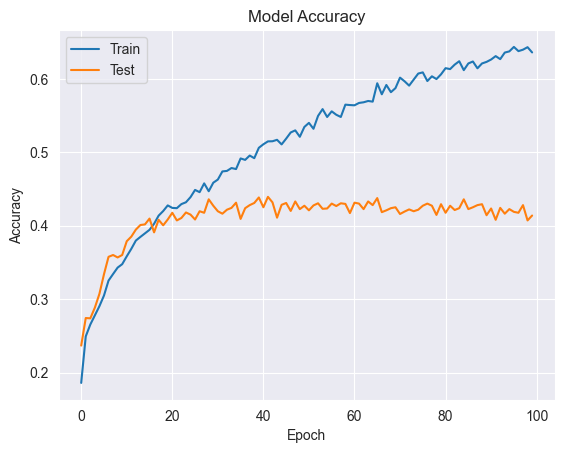

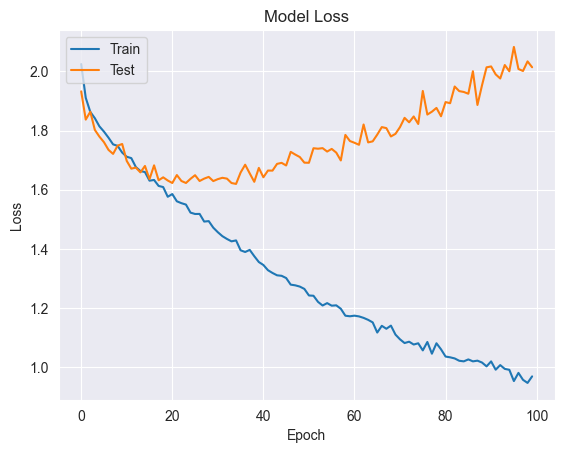

75/75 [==============================] - 3s 29ms/step
F-score: 0.4031459276817665
AUC: 0.783158966906299
75/75 [==============================] - 2s 28ms/step - loss: 2.0143 - accuracy: 0.4139
test loss : 2.014335870742798
test_accu : 0.4139224588871002


In [31]:
from keras.optimizers import Adam
from sklearn.metrics import f1_score, roc_auc_score

scores = []
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
model = Sequential()
input= (20,130,1)

model.add(Conv2D(24, (5, 5), strides=(1, 1), input_shape=input))
model.add(AveragePooling2D((2, 2), strides=(2,2)))
model.add(Activation('relu'))

model.add(Conv2D(48, (5, 5), padding="same"))
model.add(AveragePooling2D((2, 2), strides=(2,2)))
model.add(Activation('relu'))

model.add(Conv2D(48, (5, 5), padding="same"))
model.add(AveragePooling2D((2, 2), strides=(2,2)))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dropout(rate=0.5))

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(rate=0.5))

model.add(Dense(8))
model.add(Activation('softmax'))


ada = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)

model.compile(optimizer= ada, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=EPOCH_COUNT, batch_size=BATCH_SIZE, verbose=1, validation_data=(X_test, y_test))

# Plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

y_pred = model.predict(X_test)
y_pred_binary = np.argmax(y_pred, axis=1)
y_test_binary = np.argmax(y_test, axis=1)

f_score = f1_score(y_test_binary, y_pred_binary, average='weighted')
roc_auc = roc_auc_score(y_test, y_pred, average='weighted', multi_class='ovr')

print("F-score:", f_score)
print("AUC:", roc_auc)

test_loss, test_acc = model.evaluate(X_test,y_test)
print("test loss :",test_loss)
print("test_accu :",test_acc)
## menos capas overfiting utilizar batch normalization

In [33]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

75/75 [==============================] - 2s 20ms/step
F-score: 0.43369149545654373
AUC: 0.8105469098370903
               precision    recall  f1-score   support

   Electronic       0.47      0.46      0.46       294
 Experimental       0.36      0.27      0.31       298
         Folk       0.41      0.60      0.48       304
       HipHop       0.55      0.72      0.62       311
 Instrumental       0.45      0.52      0.48       304
International       0.47      0.42      0.44       296
          Pop       0.27      0.09      0.14       300
         Rock       0.51      0.55      0.53       292

     accuracy                           0.45      2399
    macro avg       0.43      0.45      0.43      2399
 weighted avg       0.43      0.45      0.43      2399


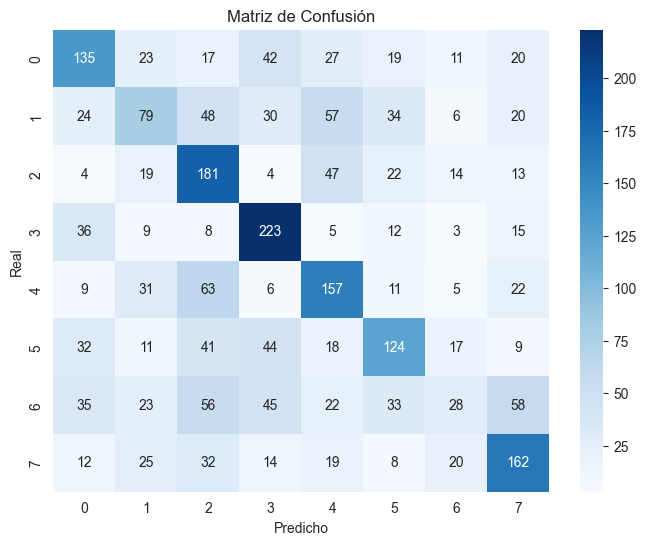

Trained and saved the model to project folder successfully.


In [34]:
model.fit(x, y)
y_pred = model.predict(X_test)
y_pred_binary = np.argmax(y_pred, axis=1)
y_test_binary = np.argmax(y_test, axis=1)
generos = ['Electronic', 'Experimental', 'Folk', 'HipHop', 'Instrumental', 'International', 'Pop', 'Rock']

f_score = f1_score(y_test_binary, y_pred_binary, average='weighted')
roc_auc = roc_auc_score(y_test, y_pred, average='weighted', multi_class='ovr')
conf_matrix = confusion_matrix(y_test_binary, y_pred_binary )

print("F-score:", f_score)
print("AUC:", roc_auc)

class_report = classification_report(y_test_binary, y_pred_binary, target_names=generos)

print(class_report)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[str(i) for i in range(8)], yticklabels=[str(i) for i in range(8)])
plt.title('Matriz de Confusión')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()
joblib.dump(model, 'model_fma_cnn2.pkl')
print("Trained and saved the model to project folder successfully.")

250/250 [==============================] - 6s 25ms/step
               precision    recall  f1-score   support

   Electronic       0.77      0.71      0.74       999
 Experimental       0.68      0.58      0.62       999
         Folk       0.67      0.79      0.73      1000
       HipHop       0.82      0.90      0.86       997
 Instrumental       0.60      0.80      0.69      1001
International       0.77      0.76      0.77       999
          Pop       0.86      0.45      0.59      1000
         Rock       0.71      0.79      0.75       999

     accuracy                           0.72      7994
    macro avg       0.74      0.72      0.72      7994
 weighted avg       0.74      0.72      0.72      7994


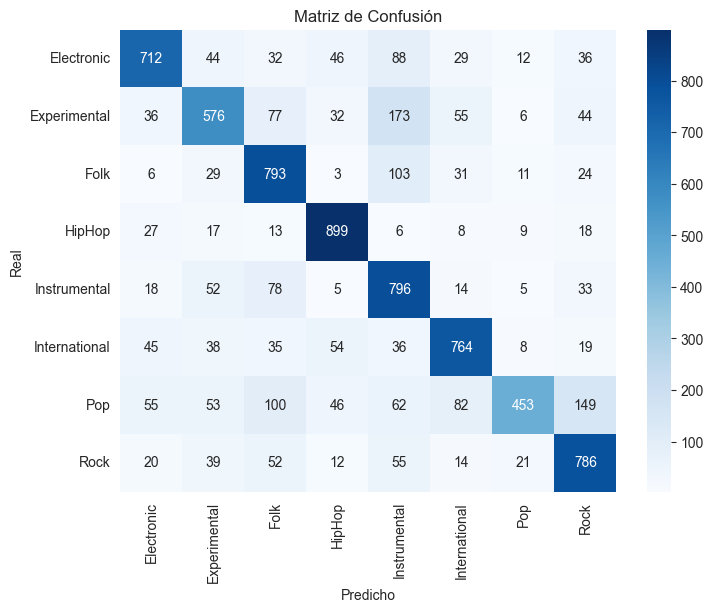

F-score: 0.7179285191442873
Precision: 0.7358203859537497
Recall: 0.7229171878909182
Trained and saved the model to project folder successfully.


In [46]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score

model.fit(x, y)
y_pred = model.predict(x)
y_pred_binary = np.argmax(y_pred, axis=1)
y_test_binary = np.argmax(y, axis=1)
generos = ['Electronic', 'Experimental', 'Folk', 'HipHop', 'Instrumental', 'International', 'Pop', 'Rock']
conf_matrix = confusion_matrix(y_test_binary, y_pred_binary )


class_report = classification_report(y_test_binary, y_pred_binary, target_names=generos)

print(class_report)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=generos, yticklabels=generos)
plt.title('Matriz de Confusión')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()
 
f_score = f1_score(y_test_binary, y_pred_binary, average='weighted')
#roc_auc = roc_auc_score(y_test_binary, y_pred_binary, average='weighted', multi_class='ovr')
precision = precision_score(y_test_binary, y_pred_binary, average='weighted')
recall = recall_score(y_test_binary, y_pred_binary, average='weighted')

print("F-score:", f_score)
#print("AUC:", roc_auc)
print("Precision:", precision)
print("Recall:", recall)
joblib.dump(model, 'model_fma_cnn_final.pkl')
print("Trained and saved the model to project folder successfully.")

In [ ]:
import joblib

modelo = joblib.load('fma_cnn.pkl')


In [ ]:
def extract_features(signal, sample_rate, frame_size, hop_size):
    mel = librosa.feature.mfcc(y=signal, sr=sample_rate, n_fft=frame_size, hop_length=hop_size)
    mel=np.array(mel)
    return(mel)

In [ ]:
import librosa
import sklearn
samp_rate = 22050
frame_size = 2048
hop_size = 512
window=23

def preprocess_audio_file(file_path):
    x, sr = librosa.load(file_path, sr=samp_rate, duration=3.0)
    features = extract_features(x, sr, frame_size, hop_size)
    scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(-1, 1))
    features_normalized = scaler.fit_transform(features)
    return features_normalized

archivo_wav = 'm.wav'

input_features = preprocess_audio_file(archivo_wav)

prediction = modelo.predict(np.expand_dims(input_features, axis=0))

clase_predicha_indice = np.argmax(prediction)

generos = ['Electronic','Experimental','Folk','HipHop','Instrumental','International','Pop','Rock']
genero_predicho = generos[clase_predicha_indice]

print('El género musical predicho para el archivo WAV es:', genero_predicho)


Experimentos con CNN Y LSTM

In [ ]:
cnn = joblib.load('fma_cnn.pkl')
lstm = joblib.load('model_fma_lstm50')


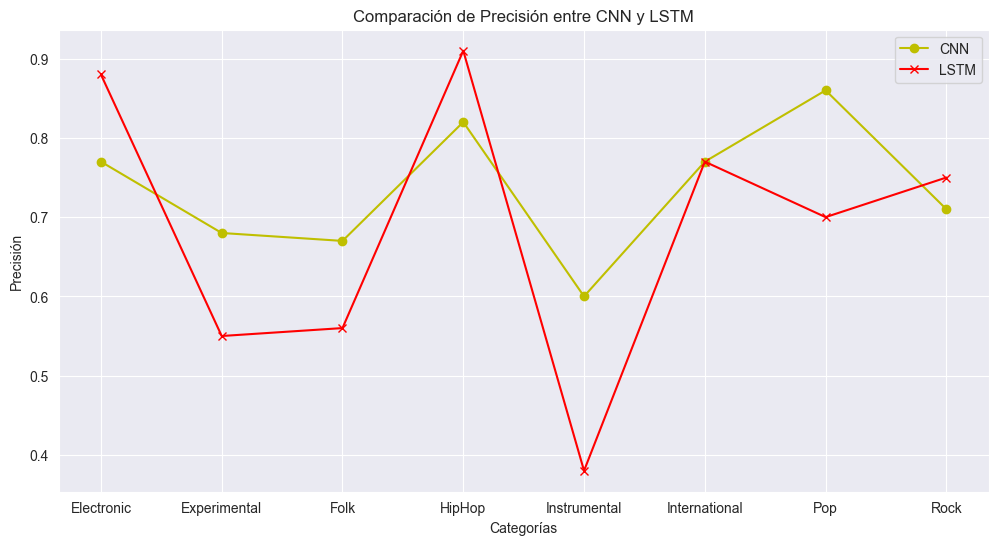

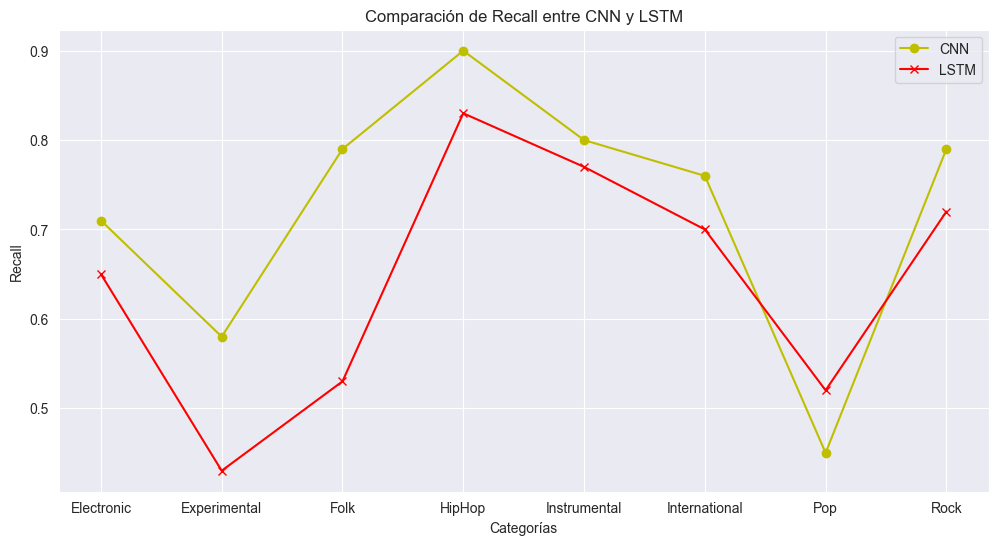

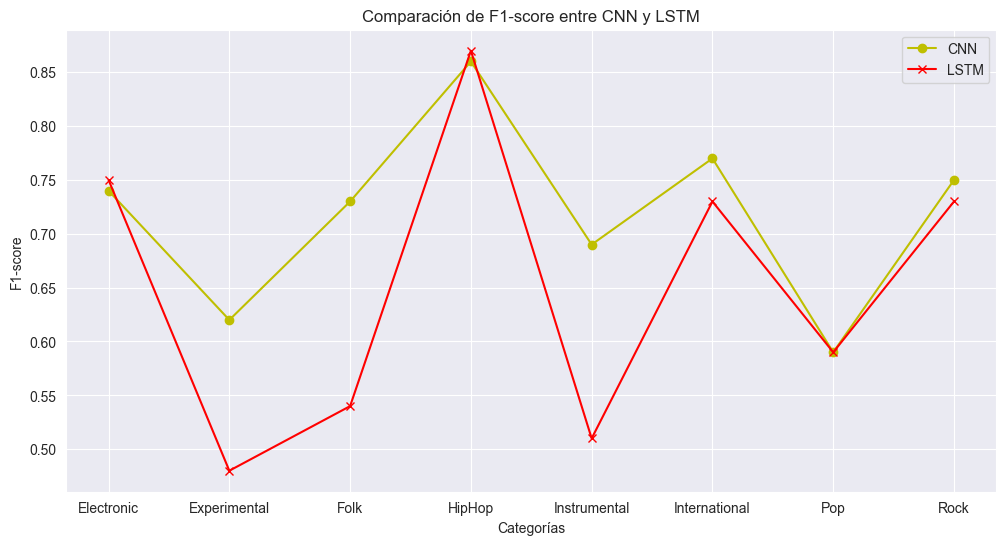

In [51]:
import matplotlib.pyplot as plt
import numpy as np

precision_cnn = [0.77, 0.68, 0.67, 0.82, 0.60, 0.77, 0.86, 0.71]
recall_cnn = [0.71, 0.58, 0.79, 0.90, 0.80, 0.76, 0.45, 0.79]
f1_score_cnn = [0.74, 0.62, 0.73, 0.86, 0.69, 0.77, 0.59, 0.75]

precision_lstm = [0.88, 0.55, 0.56, 0.91, 0.38, 0.77, 0.70, 0.75]
recall_lstm = [0.65, 0.43, 0.53, 0.83, 0.77, 0.70, 0.52, 0.72]
f1_score_lstm = [0.75, 0.48, 0.54, 0.87, 0.51, 0.73, 0.59, 0.73]

plt.figure(figsize=(12, 6))

plt.plot(categories_cnn, precision_cnn, marker='o', label='CNN', color='y')
plt.plot(categories_cnn, precision_lstm, marker='x', label='LSTM', color='r')
plt.xlabel('Categorías')
plt.ylabel('Precisión')
plt.title('Comparación de Precisión entre CNN y LSTM')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(categories_cnn, recall_cnn, marker='o', label='CNN', color='y')
plt.plot(categories_cnn, recall_lstm, marker='x', label='LSTM', color='r')
plt.xlabel('Categorías')
plt.ylabel('Recall')
plt.title('Comparación de Recall entre CNN y LSTM')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(categories_cnn, f1_score_cnn, marker='o', label='CNN', color='y')
plt.plot(categories_cnn, f1_score_lstm, marker='x', label='LSTM', color='r')
plt.xlabel('Categorías')
plt.ylabel('F1-score')
plt.title('Comparación de F1-score entre CNN y LSTM')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

input_folder_path = 'C:/UsersPAULO/Documents/GitHub/Music-Classifier/GTZAN/Data/images_original'
output_folder_path = 'C:/UsersPAULO/Documents/GitHub/Music-Classifier/GTZAN/Data'


def cargar_datos(input_folder):
    datos = []
    etiquetas = []

    for genero in os.listdir(input_folder):
        genero_path = os.path.join(input_folder, genero)

        for archivo in os.listdir(genero_path):
            archivo_path = os.path.join(genero_path, archivo)
            img = image.load_img(archivo_path, target_size=(128, 128))
            img_array = image.img_to_array(img)
            datos.append(img_array)
            etiquetas.append(genero)

    datos = np.array(datos)
    etiquetas = np.array(etiquetas)

    return datos, etiquetas


X, y = cargar_datos(input_folder_path)

le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train / 255.0
X_test = X_test / 255.0

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'\nAccuracy en el conjunto de prueba: {test_acc}')

model.save(output_folder_path + '/modelo_cnn_espectrogramas.h5')
